# Análisis RFM: Recencia, Frecuencia y Valor Monetario

El análisis RFM es una técnica de segmentación de clientes utilizada en marketing y gestión de relaciones con clientes (CRM). Se basa en tres dimensiones clave del comportamiento del cliente:

- **Recencia (Recency)**: Mide la antigüedad de la última compra de un cliente. Se refiere a cuán reciente fue la última interacción o transacción de un cliente con la empresa.

- **Frecuencia (Frequency)**: Mide con qué frecuencia un cliente realiza compras o interacciones con la empresa en un período de tiempo específico. Se refiere a la cantidad de transacciones que un cliente ha realizado en un período determinado.

- **Valor Monetario (Monetary Value)**: Mide el valor total de las compras realizadas por un cliente en un período de tiempo específico. Se refiere al monto total que un cliente ha gastado en transacciones con la empresa.

El análisis RFM clasifica a los clientes en grupos o segmentos basados en estos tres criterios, lo que permite identificar y segmentar a los clientes en función de su comportamiento de compra y su valor para la empresa.

### ¿Para qué sirve el análisis RFM?

El análisis RFM permite a las empresas comprender mejor el comportamiento y el valor de sus clientes, lo que a su vez les ayuda a tomar decisiones informadas sobre estrategias de marketing, segmentación de clientes, retención de clientes y personalización de experiencias de cliente.

### Desarrollo del Proyecto

En este proyecto de análisis RFM utilizando Python, se utilizará un conjunto de datos que contiene información sobre transacciones de clientes. Se aplicará el análisis RFM para calcular y segmentar a los clientes en base a su Recencia, Frecuencia y Valor Monetario. Luego, se realizarán visualizaciones y análisis adicionales para comprender mejor el comportamiento y el valor de los clientes, así como para identificar oportunidades de negocio y estrategias de marketing.


In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot

In [ ]:
# Configuración de estilo y paleta de colores
sns.set_style('whitegrid')
palette = 'Set2'

# Ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv('/content/Data.csv', encoding='latin1')

In [ ]:
data.head()

,IDCliente,NombreCompleto,FechaCompra,PaisTerritorioVenta,RegionTerritorioVenta,NombreProducto,NombreSubcategoriaProducto,NombreCategoriaProducto,MontoVenta
0,11012,Lauren Walker,2013-03-16,United States,Northwest,Cubierta de montaÃ±a GA,Cubierta y cÃ¡mara,Accesorio,35.00
1,11012,Lauren Walker,2013-03-16,United States,Northwest,Cubierta para cÃ¡mara de montaÃ±a,Cubierta y cÃ¡mara,Accesorio,4.99
2,11012,Lauren Walker,2013-03-16,United States,Northwest,"Casco deportivo: 100, negro",Casco,Accesorio,34.99
3,11012,Lauren Walker,2013-10-15,United States,Northwest,Cubierta para cÃ¡mara de carretera,Cubierta y cÃ¡mara,Accesorio,3.99
4,11013,Ian Jenkins,2013-04-13,United States,Northwest,Cubierta para cÃ¡mara de carretera,Cubierta y cÃ¡mara,Accesorio,3.99


In [ ]:
# Convertir la columna de fechas a formato datetime
data['FechaCompra'] = pd.to_datetime(data['FechaCompra'])

In [ ]:
# Encontrar la fecha mínima y máxima en el dataset
fecha_minima = data['FechaCompra'].min()
fecha_maxima = data['FechaCompra'].max()

print("Fecha mínima en el dataset:", fecha_minima)
print("Fecha máxima en el dataset:", fecha_maxima)

Fecha mínima en el dataset: 2010-12-29 00:00:00
Fecha máxima en el dataset: 2014-01-28 00:00:00


In [ ]:
# Exploración inicial del dataset
print("Información general del conjunto de datos:")
print(data.info())

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   IDCliente                   10000 non-null  int64         
 1   NombreCompleto              10000 non-null  object        
 2   FechaCompra                 10000 non-null  datetime64[ns]
 3   PaisTerritorioVenta         10000 non-null  object        
 4   RegionTerritorioVenta       10000 non-null  object        
 5   NombreProducto              10000 non-null  object        
 6   NombreSubcategoriaProducto  10000 non-null  object        
 7   NombreCategoriaProducto     10000 non-null  object        
 8   MontoVenta                  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 703.2+ KB
None


In [ ]:
# Estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del conjunto de datos:")
print(data.describe())


Estadísticas descriptivas del conjunto de datos:
          IDCliente    MontoVenta
count  10000.000000  10000.000000
mean   15720.333800    557.783815
std     3313.352824    932.375199
min    11012.000000      3.990000
25%    12964.500000     21.490000
50%    15285.000000     34.990000
75%    18528.000000    769.490000
max    22159.000000   3578.270000


In [ ]:
# Función para verificar el dataframe
def check_df(dataframe, head=5):
    """
    Función para verificar el dataframe:
    - Muestra la forma, tipos de datos, valores perdidos y duplicados del dataframe.
    """
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe().T)

check_df(data)

------------------------------- SHAPE --------------------------------
Rows: 10000
Columns: 9
------------------------------- TYPES --------------------------------
IDCliente                              int64
NombreCompleto                        object
FechaCompra                   datetime64[ns]
PaisTerritorioVenta                   object
RegionTerritorioVenta                 object
NombreProducto                        object
NombreSubcategoriaProducto            object
NombreCategoriaProducto               object
MontoVenta                           float64
dtype: object
--------------------------- MISSING VALUES ---------------------------
IDCliente                     0
NombreCompleto                0
FechaCompra                   0
PaisTerritorioVenta           0
RegionTerritorioVenta         0
NombreProducto                0
NombreSubcategoriaProducto    0
NombreCategoriaProducto       0
MontoVenta                    0
dtype: int64
------------------------- DUPLICATED VALUES 

In [ ]:
# Análisis de series temporales
Ventas_por_semana = data.resample('w', on='FechaCompra').size()
fig = px.line(data, x=Ventas_por_semana.index, y=Ventas_por_semana,
              labels={'y': 'Número de Ventas', 'x': 'Fecha'})
fig.update_layout(title_text='Número de Ventas Semanal', title_x=0.5, title_font=dict(size=18))
fig.show()

cliente_unico_por_semana = data.resample('w', on='FechaCompra').IDCliente.nunique()
fig = px.line(cliente_unico_por_semana, x=cliente_unico_por_semana.index, y=cliente_unico_por_semana,
              labels={'y': 'Número de Clientes'})
fig.update_layout(title_text='Número de Clientes Semanal', title_x=0.5, title_font=dict(size=18))
fig.show()

In [ ]:
# Análisis de RFM
fecha_referencia = data['FechaCompra'].max() + pd.DateOffset(days=1)
rfm_data = data.groupby('IDCliente').agg({
    'FechaCompra': lambda x: (fecha_referencia - x.max()).days,
    'IDCliente': 'count',
    'MontoVenta': 'sum'
})
rfm_data.columns = ['Recencia', 'Frecuencia', 'ValorMonetario']

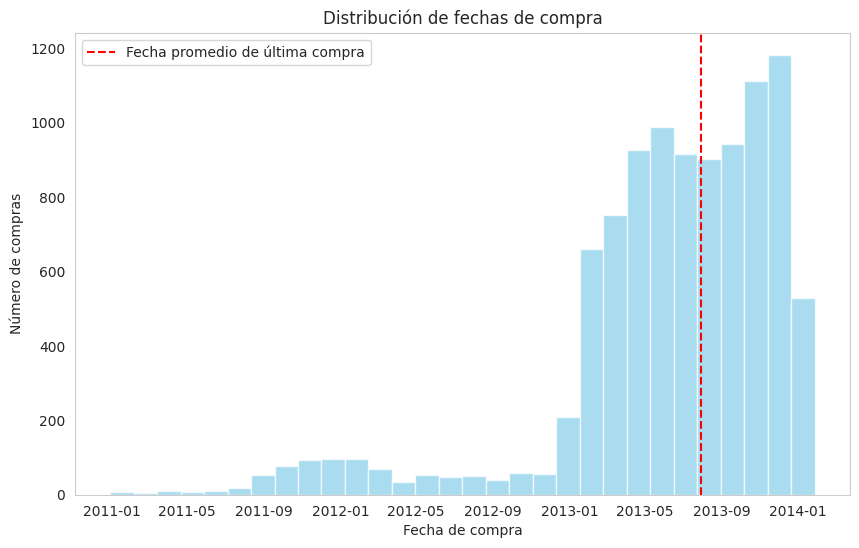

In [ ]:
#Grafico del promedio de fechas de ultima compra de los clientes
# Calcular la fecha promedio en la que los clientes dejaron de comprar
promedio_fecha_ultima_venta = data['FechaCompra'].max() - pd.to_timedelta(rfm_data['Recencia'].mean(), unit='D')

plt.figure(figsize=(10, 6))
plt.axvline(x=promedio_fecha_ultima_venta, color='red', linestyle='--', label='Fecha promedio de última compra')
plt.hist(data['FechaCompra'], bins=30, color='skyblue', alpha=0.7)
plt.title('Distribución de fechas de compra')
plt.xlabel('Fecha de compra')
plt.ylabel('Número de compras')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Histograma de la Recencia
fig = px.histogram(rfm_data, x='Recencia', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Distribución de Frecuencia de Visitas de los Clientes',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
# Histograma del Valor Monetario
fig = px.histogram(rfm_data, x='ValorMonetario', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Distribución Monetaria de los Clientes',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
# Asignar puntuaciones RFM
def rfm_scores_improved(dataframe):
    """
    Asigna puntuaciones RFM a los clientes incluyendo la Frecuencia en el análisis:
    - Recencia_score: 5 - más reciente, 1 - menos reciente
    - Frecuencia_score: 1 - menos frecuente, 5 - más frecuente
    - ValorMonetario_score: 1 - menos valioso, 5 - más valioso
    - RFM_SCORE: Suma de Recencia_score, Frecuencia_score y ValorMonetario_score
    """
    dataframe["Recencia_score"] = pd.qcut(dataframe["Recencia"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["Frecuencia_score"] = pd.qcut(dataframe["Frecuencia"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["ValorMonetario_score"] = pd.qcut(dataframe["ValorMonetario"], 5, labels=[1, 2, 3, 4, 5])

    # Sumamos las puntuaciones para obtener un RFM_SCORE mejorado
    dataframe["RFM_SCORE"] = dataframe["Recencia_score"].astype(str) + dataframe["Frecuencia_score"].astype(str) + dataframe["ValorMonetario_score"].astype(str)

    return dataframe


rfm_scores_improved(rfm_data)

,Recencia,Frecuencia,ValorMonetario,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE
IDCliente,,,,,,,
11012,106,4,78.97,4,5,3,453
11013,8,5,113.96,5,5,3,553
11014,274,5,113.96,2,5,3,253
11015,376,3,2500.97,1,4,5,145
11016,354,2,2329.99,1,2,4,124
...,...,...,...,...,...,...,...
22152,53,3,1205.47,5,5,4,554
22153,246,2,548.98,2,4,3,243
22157,113,1,29.99,4,2,1,421


In [ ]:
# Mapeo de segmentos RFM
mapa_segmentos = {
    r'[4-5][4-5][4-5]': 'Campeones',            # Muy recientes, muy frecuentes, muy altos gastos
    r'[2-3][4-5][4-5]': 'Leales',               # Menos recientes, pero frecuentes y altos gastos
    r'[4-5][2-5][4-5]': 'Potencial Alto',       # Muy recientes, cualquier frecuencia, altos gastos
    r'[4-5][2-5][1-3]': 'Nuevos Gastadores',    # Muy recientes, cualquier frecuencia, gastos moderados
    r'[2-3][2-3][4-5]': 'Gastadores Ocasionales', # Menos recientes, frecuencia y gastos moderados
    r'[2-4][1-5][1-4]': 'Clientes con Potencial', # Cualquier recencia, cualquier frecuencia, gastos moderados
    r'[2-3][4-5][2-3]': 'Leales Económicos',    # Menos recientes, frecuentes, gastos moderados
    r'[1][4-5][4-5]': 'En Riesgo',              # No recientes, pero frecuentes y altos gastos
    r'[1-2][1-3][4-5]': 'Casi Perdidos',        # No recientes, baja frecuencia, pero altos gastos
    r'[1-2][4-5][1-3]': 'Necesitan Atención',   # No recientes, frecuentes, gastos bajos o moderados
    r'[3-4][1-3][1-3]': 'Promedio',             # Recientes y frecuencia moderada, gastos bajos
    r'[1-3][1-3][1-3]': 'Sin Actividad',        # No recientes, no frecuentes, bajos gastos
    r'[1-3][1-3][1-2]': 'Dormidos',             # poca participacion.
    r'[4-5][1][1-5]': 'Clientes Nuevos',        # Muy recientes, no frecuentes, cualquier gasto
    r'[1][1][1]': 'Perdidos',                   # No recientes, no frecuentes, gastos muy bajos
}


rfm_data['segmento'] = rfm_data['RFM_SCORE'].replace(mapa_segmentos, regex = True)

rfm_data

,Recencia,Frecuencia,ValorMonetario,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE,segmento
IDCliente,,,,,,,,
11012,106,4,78.97,4,5,3,453,Nuevos Gastadores
11013,8,5,113.96,5,5,3,553,Nuevos Gastadores
11014,274,5,113.96,2,5,3,253,Clientes con Potencial
11015,376,3,2500.97,1,4,5,145,En Riesgo
11016,354,2,2329.99,1,2,4,124,Casi Perdidos
...,...,...,...,...,...,...,...,...
22152,53,3,1205.47,5,5,4,554,Campeones
22153,246,2,548.98,2,4,3,243,Clientes con Potencial
22157,113,1,29.99,4,2,1,421,Nuevos Gastadores


<Figure size 2000x1500 with 0 Axes>

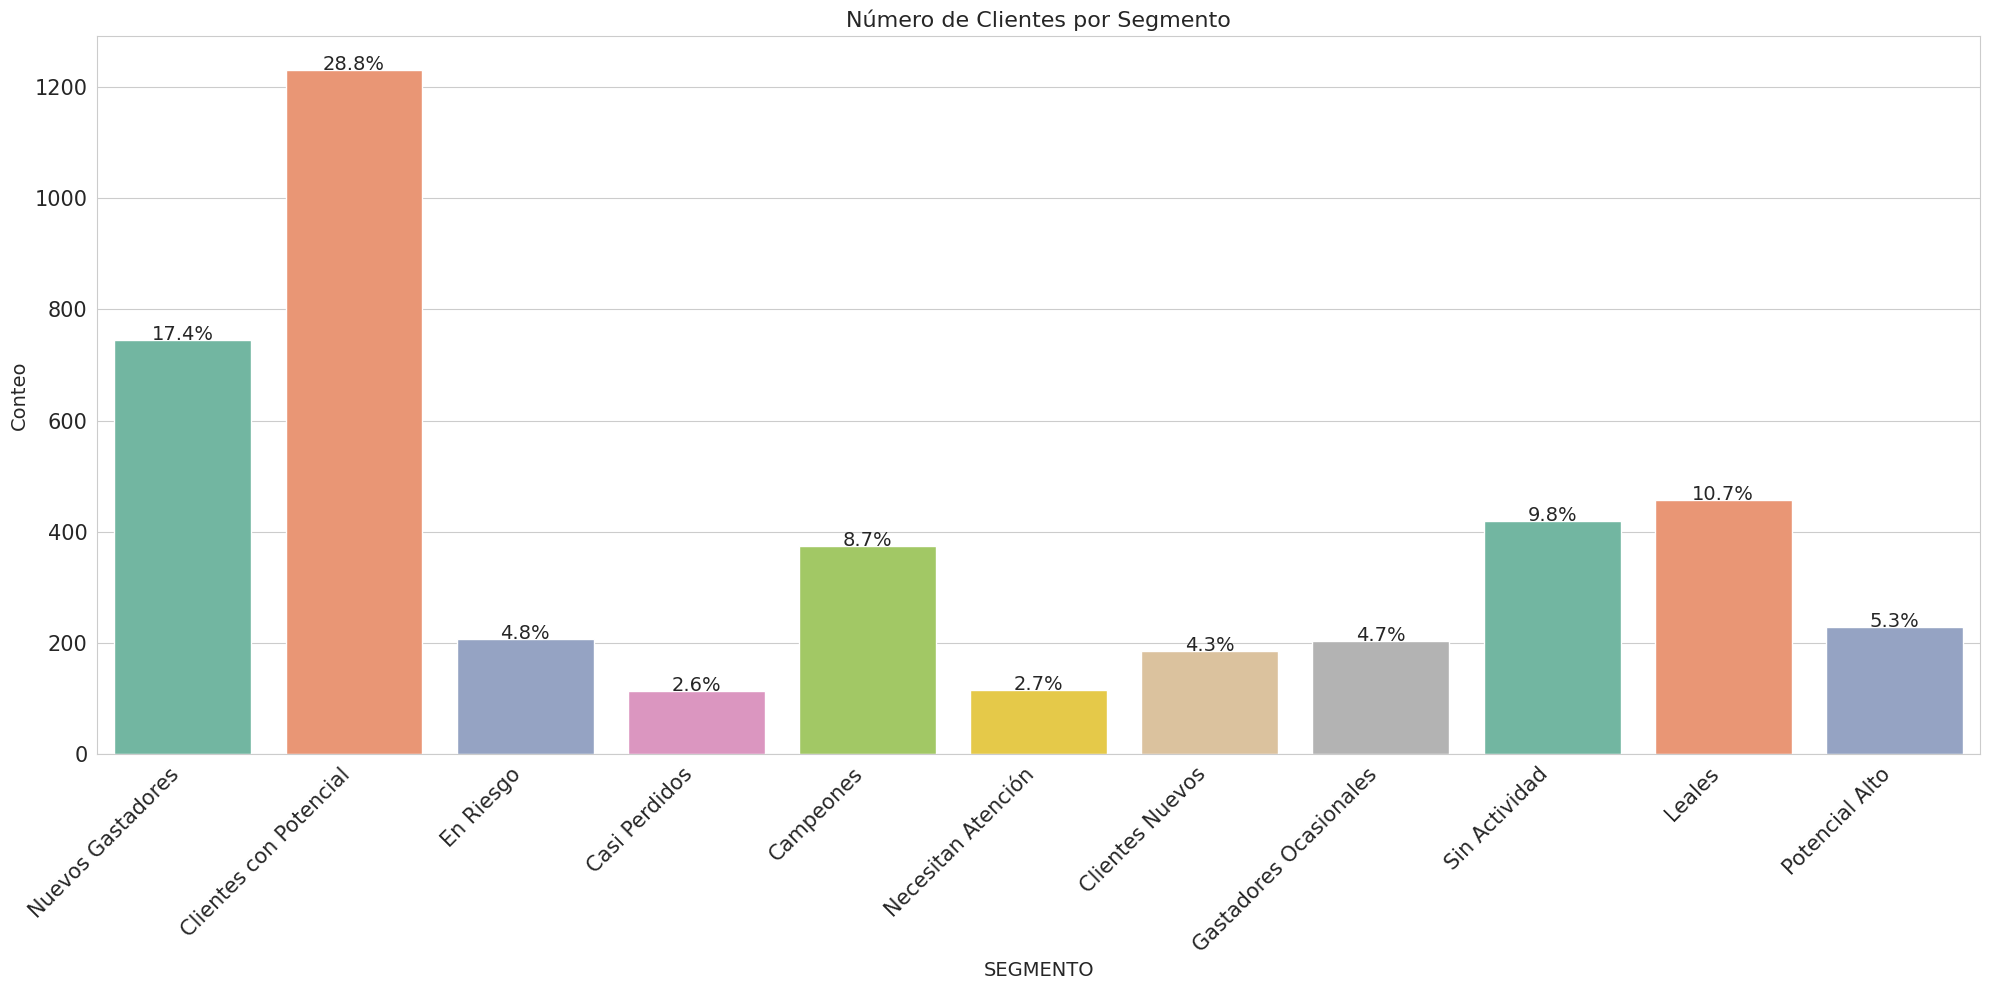

In [ ]:
# Gráfico de barras de segmentos RFM
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=rfm_data, x='segmento', palette=palette, ax=ax)
total = len(rfm_data.segmento)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height()
    ax.annotate(percentage, (x, y), ha='center', size=14)  # Centrar la anotación

plt.title('Número de Clientes por Segmento', size=16)
plt.ylabel('Conteo', size=14)
plt.xlabel('SEGMENTO', fontsize=14)
plt.xticks(rotation=45, ha='right', size=15)  # Rotar las etiquetas del eje x
plt.yticks(size=15)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama para que la subtrama se ajuste al área de la figura
plt.show()



In [ ]:
# Tabla de clientes en el segmento "Clientes con Potencial"
segmento = "Clientes con Potencial"
a = rfm_data[rfm_data["segmento"] == segmento].sort_values(by="ValorMonetario", ascending=False).head()
colorscale = "inferno"
table = ff.create_table(a, colorscale=colorscale)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 12
iplot(table)


In [ ]:
# Treemap de segmentos RFM
x = rfm_data.segmento.value_counts()
fig = px.treemap(x, path=[x.index], values=x)
fig.update_layout(title_text='Distribución de los Segmentos RFM', title_x=0.5, title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()

In [ ]:
# Estadísticas por segmento RFM
rfm_data[["segmento", "Recencia", "Frecuencia", "ValorMonetario"]].groupby("segmento").agg(["mean", "count"])

Recencia       Frecuencia       ValorMonetario      
                              mean count       mean count           mean count
segmento                                                                      
Campeones                81.240642   374   3.502674   374    2724.787651   374
Casi Perdidos           336.787611   113   1.867257   113    3047.221726   113
Clientes Nuevos          41.324324   185   1.000000   185     495.649081   185
Clientes con Potencial  197.908130  1230   1.784553  1230     272.363593  1230
En Riesgo               338.507246   207   3.681159   207    4090.123286   207
Gastadores Ocasionales  208.714286   203   1.980296   203    2496.031334   203
Leales                  213.026258   457   3.741794   457    3597.440540   457
Necesitan Atención      320.750000   116   2.991379   116     291.620517   116
Nuevos Gastadores        72.403226   744   2.432796   744     237.223602   744
Potencial Alto           79.429825   228   2.000000   228    2132.876806   228
Sin Actividad           331.326969   419   1.460621   419     223.701074   419

In [ ]:
# Guardar el dataframe RFM
# rfm_data.to_csv("rfm.csv")